In [1]:
#import macroparameters

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import plotly.express as px

    
import os, sys, shutil


def print_all_df(df):
    # Permanently changes the pandas settings
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    # All dataframes hereafter reflect these changes.
    display(df)
    
    print('**RESET_OPTIONS**')
    
    # Resets the options
    pd.reset_option('all')
    

# Define Prefix of which experiment to analyse

In [2]:
prefix = "ALTE001"

In [3]:
# navigate into tidy_data_files and make a list of all files

os.chdir('/src/data/tidy_data_files')
os.getcwd()

items = os.listdir(".")

# lists all .csv
csv_list = []
for names in items:
    if names.endswith(".csv"):
        csv_list.append(names)
print(csv_list)



['ALTE001_tidy_data.csv']


In [4]:
# import the correct tidy dataset

print(os.getcwd())

# make file name
dataset = prefix +'_tidy_data.csv'

# import into pandas DF
all_gain_data = pd.read_csv(dataset, header=0)

# change back to /src for neatness
os.chdir('/src')

all_gain_data

/src/data/tidy_data_files


,Well,Sample ID,Time (Minutes),RFUs,Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,Reaction Type,Replicate,...,lysate_aspirate_height_inc,substrates_aspirate_height,substrates_aspirate_height_inc,wax_dispense_volume,wax_dispense_height,wax_new_tip,wax_touch_tip,wax_air_gap,wax_disposal_volume,Assay Date
0,B12,Sample X1,0,3323,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,1,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1,B13,Sample X2,0,3397,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,2,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
2,B14,Sample X3,0,3221,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,3,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
3,B15,Sample X4,0,3233,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,4,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
4,B16,Sample X5,0,3220,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,5,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,B17,Sample X6,266,77,800,485_520_1,s70_deGFP_MGA,Michael_ES_001,TXTL,6,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
2676,B18,Sample X7,266,78,800,485_520_1,s70_deGFP_MGA,Michael_ES_001,TXTL,7,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
2677,B19,Sample X8,266,78,800,485_520_1,s70_deGFP_MGA,Michael_ES_001,TXTL,8,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
2678,B20,Sample X9,266,97,800,485_520_1,s70_deGFP_MGA,Michael_ES_001,TXTL,9,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06


In [5]:
# get individual gain values

print(all_gain_data['Gain Setting'].unique())

# make a list of the gains tested
gain_df_list = []

for gain in all_gain_data['Gain Setting'].unique():
    
    gain_df_list.append(all_gain_data[all_gain_data['Gain Setting']==gain])
    

[1500  800]


# Plot all replicates for both gain settings

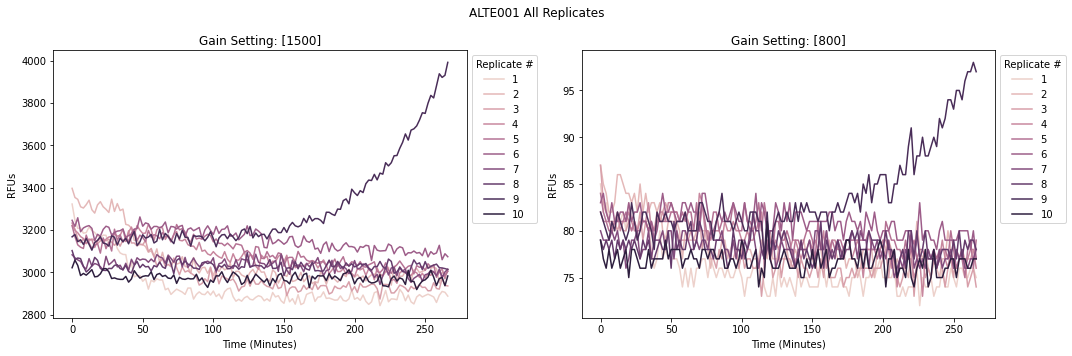

In [6]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1, 2, 1)

for i, gain in enumerate(gain_df_list):
    
    ax = plt.subplot(1, 2, i+1)
    
    sns.lineplot(data = gain,
            x = 'Time (Minutes)',
            y = 'RFUs',
            hue = 'Replicate',
            legend='full',
            ax=ax)
    
    ax.legend(title="Replicate #", loc = 2, bbox_to_anchor = (1,1))
    ax.set(title="Gain Setting: " + str(gain['Gain Setting'].unique()))

    
fig.suptitle(prefix+ " All Replicates")
fig.tight_layout()




##### Save fig


path = "/src/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_all_replicates.png")


#navigate home for neatness
os.chdir('/src')



plt.show()



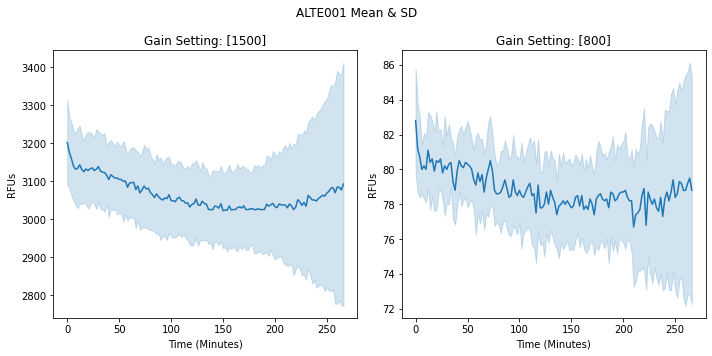

In [7]:
fig = plt.figure(figsize=(10,5))

ax = plt.subplot(1, 2, 1)

for i, gain in enumerate(gain_df_list):
    
    ax = plt.subplot(1, 2, i+1)
    
    sns.lineplot(data = gain,
            x = 'Time (Minutes)',
            y = 'RFUs',
            ci = 'sd',
            ax=ax)
    
    ax.set(title="Gain Setting: " + str(gain['Gain Setting'].unique()))
    
fig.suptitle(prefix+ " Mean & SD")
fig.tight_layout()


##### Save fig


path = "/src/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_mean_sd.png")


#navigate home for neatness
os.chdir('/src')

plt.show()


<AxesSubplot:xlabel='Time (Minutes)', ylabel='RFUs'>

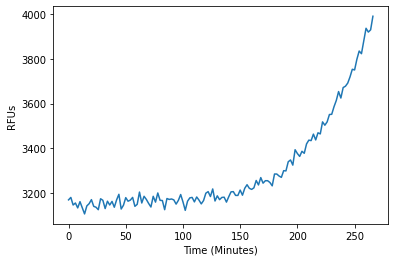

In [8]:
g = all_gain_data[all_gain_data['Gain Setting']==1500]
g= g[g['Replicate']==9]

sns.lineplot(data=g, x="Time (Minutes)", y="RFUs")

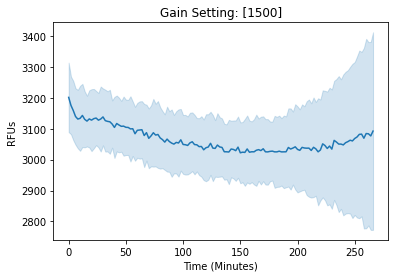

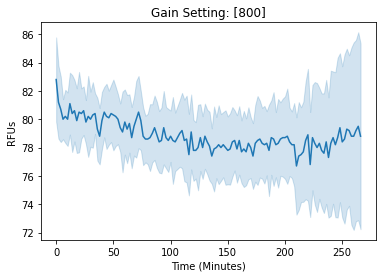

In [9]:
# Plot mean and sd for all gain settings
for gain in gain_df_list:
    
    sns.lineplot(data = gain,
            x = 'Time (Minutes)',
            y = 'RFUs',
            ci = 'sd')
    
    plt.title("Gain Setting: " + str(gain['Gain Setting'].unique()))
    
    plt.show()

In [10]:
timepoint = all_gain_data[all_gain_data["Time (Minutes)"] == 250]
timepoint = timepoint[timepoint['Gain Setting'] == 1500]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try stripplot
  warnings.warn(msg, UserWarning)


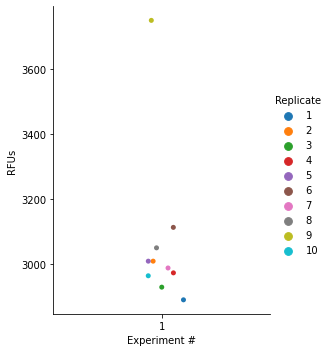

In [11]:
ax1 = sns.catplot(
            data = timepoint,
            x = "Experiment #",
            y = "RFUs",
            hue="Replicate",
            ax=ax,
            height=5,
            aspect=.8)

ax1 = sns.boxplot(
            data=timepoint,
            x="Experiment #",
            y="RFUs",
            ax=ax,
            whis=np.inf)





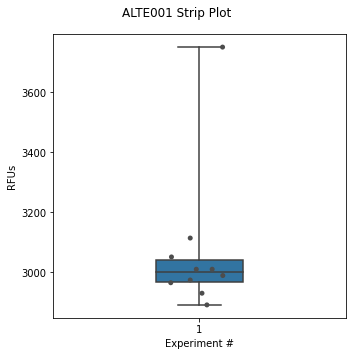

In [19]:
fig = plt.figure(figsize=(5,5))

ax = sns.boxplot(x="Experiment #", y="RFUs", data=timepoint, whis=np.inf, width=0.3)
ax = sns.stripplot(x="Experiment #", y="RFUs", data=timepoint, color=".3")

fig.suptitle(prefix+ " Strip Plot")
fig.tight_layout()


##### Save fig


path = "/src/data/plots/"

# make directory for sticking the output in
if os.path.isdir(path) == False:
    os.mkdir(path, mode=0o777)
    
    
#navigate to tidy_data_files
os.chdir(path)

plt.savefig(prefix+"_box_strip_plot.png.png")


#navigate home for neatness
os.chdir('/src')

plt.show()

In [13]:
timepoint

,Well,Sample ID,Time (Minutes),RFUs,Gain Setting,Chromatic Settings,Amplicon DNA Template,Energy Solution,Reaction Type,Replicate,...,lysate_aspirate_height_inc,substrates_aspirate_height,substrates_aspirate_height_inc,wax_dispense_volume,wax_dispense_height,wax_new_tip,wax_touch_tip,wax_air_gap,wax_disposal_volume,Assay Date
1250,B12,Sample X1,250,2891,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,1,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1251,B13,Sample X2,250,3010,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,2,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1252,B14,Sample X3,250,2930,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,3,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1253,B15,Sample X4,250,2974,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,4,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1254,B16,Sample X5,250,3010,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,5,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1255,B17,Sample X6,250,3114,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,6,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1256,B18,Sample X7,250,2989,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,7,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1257,B19,Sample X8,250,3051,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,8,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1258,B20,Sample X9,250,3751,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,9,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
1259,B21,Sample X10,250,2965,1500,485_520_2,s70_deGFP_MGA,Michael_ES_001,TXTL,10,...,0.4,9,0.4,35,5,never,True,20,30,2022-01-06
